<a href="https://colab.research.google.com/github/l2onnie/cop4630/blob/master/hw3/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem one

Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Implementation of the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

In [0]:
def get_random_data(w, b, mu, sigma, m):

  # labels with 50% chance
  c = np.random.randint(2, size=m)
  # choosing noise
  n = np.random.normal(mu, sigma, m)
  # feature 1
  x_1 = np.random.rand(m)

  #setting 2nd feature
  x_2 = np.empty(shape=(m,))
  for x in range(0,m):
    x_2[x] = w * x_1[x] + b + (-1)**c[x] * n[x]

  data = np.column_stack([x_1, x_2])

  return (data, c)

Function that plot the data

In [0]:
def display_random_data(data, labels):
  for lb, point in zip(labels, data):
    plt.scatter(point[0], point[1], color = ('red' if lb == 1 else 'blue') )
  plt.show()

Generate random data and plot them then create training and test set

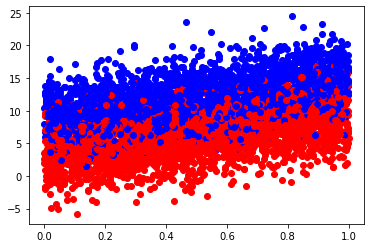

In [6]:
# generate and plot data
m = 5000
data, labels = get_random_data(6,6,3,3,m)
display_random_data(data, labels)

# create train and test set
split = (int)(m*0.8)
#training set 80%
train_data = data[:split]
train_label = labels[:split]

#test set 20%
test_data = data[split:]
test_label = labels[split:]



---



---
# Problem 2


Import libaries

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

Build and compile model and train it

In [8]:
#build model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.002), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
#train model
history = model.fit(train_data, train_label, epochs=250, batch_size=512, validation_data=(test_data, test_label))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
8/8 [==============================] - 0s 20ms/step - loss: 2.8726 - accuracy: 0.5163 - val_loss: 2.6865 - val_accuracy: 0.5350
Epoch 2/250
8/8 [==============================] - 0s 5ms/step - loss: 2.7883 - accuracy: 0.5167 - val_loss: 2.6189 - val_accuracy: 0.5350
Epoch 3/250
8/8 [==============================] - 0s 4ms/step - loss: 2.7141 - accuracy: 0.5173 - val_loss: 2.5589 - val_accuracy: 0.5350
Epoch 4/250
8/8 [==============================] - 0s 4ms/step - loss: 2.6574 - accuracy: 0.5173 - val_loss: 2.5006 - val_accuracy: 0.5350
Epoch 5/250
8/8 [==============================] - 0s 4ms/step - loss: 2.5899 - accuracy: 0.5175 - 

# Finding separting line.
Dot product summation from true line:
```
w * x + b
```
can be rewrite as :


```
w1 * x1 + w2 * x2 + b
```
for 2 dimensions inputs and weights vectors. Now We can rewrite x1 as x and x2 as y so


```
w1x + w2y + b
```
Now we can solve for x-intercept and y-intercept:


```
x = -(b - w2y) / w1
if y == 0
x = -(b - w2 * 0) / w1
x = -b / w1

y = -(b - w1x) / w2
if x == 0
y = -(b - w1 * 0) / w2
y = -b / w2
```
Now find slope m using those 2 points, then form the slope-intercept form:


```
point_1 = (0, -b / w2) 
point_2 = (-b / w1, 0)
m = (y2 - y1) / (x2 - x1)
m = (0 - -(b / w2)) / (-(b / w1) - 0)
m = -(b / w2) / (b / w1)

slope = -(b / w2) / (b / w1)
y-intercept = -b / w2
y = (-(b / w2) / (b / w1))x + (-b / w2)
```





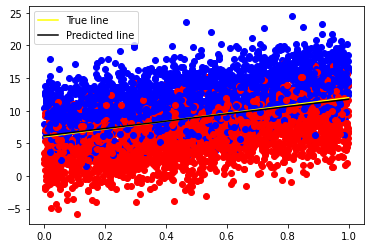

In [10]:
# True line 
xt = np.linspace(0.0, 1.0, 100)
# y = w * x + b
yt =  xt * 6 + 6
#plot the true line
plt.plot(xt, yt, color='yellow', label = "True line" )

#Calculate the separating line from trained model
xs = np.linspace(0.0, 1.0, 100)
#Extracting the two weights and bias from model
w1 = model.layers[0].get_weights()[0][0][0]
w2 = model.layers[0].get_weights()[0][1][0]
b = model.layers[0].get_weights()[1][0]
#calculating y using above formula
ys = (-(b/w2)/(b/w1))*xs + (-b/w2)
#plot the separating line
plt.plot(xs, ys, color='black', label = "Predicted line" )
plt.legend()
display_random_data(data, labels)

Display Heatmap

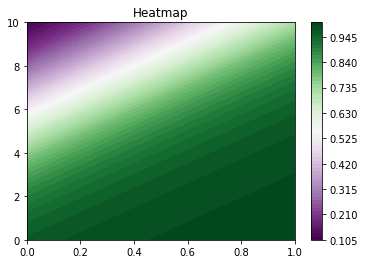

In [11]:
xx = np.linspace(0, 1, 300)
yy = np.linspace(0, 10, 300)
XX, YY = np.meshgrid(xx, yy)
Z = model.predict(np.c_[XX.flatten(), YY.flatten()])
Z = Z.reshape((300,300))

contours = plt.contourf(XX, YY, Z, 60, cmap='PRGn')
plt.colorbar()
plt.title("Heatmap")

plt.show()



---



---

# Problem 3
Implement a logistic regression model from scratch and train it

In [0]:
#sigmoid function
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

# binary cross entropy function
def binary_cross_entropy_loss(y, a):
  return (-y) * np.log(a) - (1-y) * np.log(1-a)


In [0]:
#epochs and learning rate
epochs = 500
lr = 0.002

np.random.seed(42)
initial_weight = np.random.randn(2)
weight = initial_weight
bias = np.zeros(1)

for epoch in range(epochs):
  for x in range(split):
    y = np.dot(weight, train_data[x]) + bias
    a = sigmoid(y) - train_label[x]
    gradient = a * train_data[x]
    weight = weight - lr * gradient


Plot true line and separating line

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


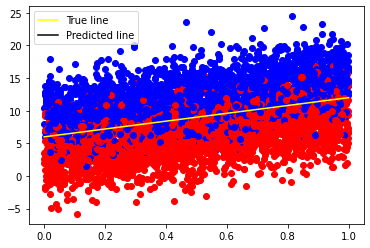

In [21]:
# True line 
xa = np.linspace(0.0, 1.0, 100)
# y = w * x + b
ya =  xa * 6 + 6
#plot the true line
plt.plot(xa, ya, color='yellow', label = "True line" )

#Calculate the separating line from trained model
xb = np.linspace(0.0, 1.0, 100)
#Extracting the two weights and bias from model
w1 = weight[0]
w2 = weight[1]
bb = bias[0]
#calculating y using above formula
yb = (-(bb/w2)/(bb/w1))*xb + (-bb/w2)
#plot the separating line
plt.plot(xb, yb, color='black', label = "Predicted line" )
plt.legend()
display_random_data(data, labels)

Heat Map

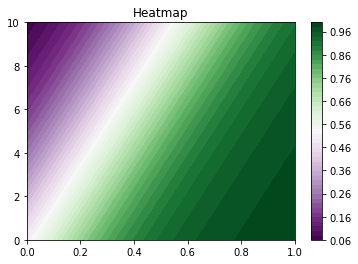

In [22]:
xx = np.linspace(0, 1, 300)
yy = np.linspace(0, 10, 300)
XX, YY = np.meshgrid(xx, yy)
Z = sigmoid(XX.flatten()* weight[0] + YY.flatten() * weight[1]+bias)
Z = Z.reshape((300,300))

contours = plt.contourf(XX, YY, Z, 60, cmap='PRGn')
plt.colorbar()
plt.title("Heatmap")

plt.show()

Sources:

https://colab.research.google.com/drive/16k3mkojt3pFbZR7ycEpms2NIOJsdQUmz

https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.normal.html

https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/imdb_movie_reviews_classification_dense_layers.ipynb

https://keras.io/layers/about-keras-layers/

https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf